In [1]:
import pandas as pd
import numpy as np

# Load the excel file
df = pd.read_excel('data/distances.xlsx', sheet_name='Stepheight_corrected')

# Get participant IDs
participant_ids = set([col[:-2] for col in df.columns])

# Prepare data structure to hold step height data
step_height_data = {pid: {} for pid in participant_ids}

# Extract step height data
for col in df.columns:
    pid, condition = col.split('_')
    step_height_data[pid][int(condition)] = df[col].values

# Prepare structure for consolidated data
consolidated_data = {1: [], 2: [], 3: []}

# Organize data and calculate mean for each condition
for pid in participant_ids:
    conditions = step_height_data[pid]
    for condition in conditions:
        data = conditions[condition]
        consolidated_data[condition].extend(data)  

# Calculate and print mean step height for each condition
for condition, data in consolidated_data.items():
    mean = np.mean(data)
    print(f'The mean step height for condition {condition} is {mean}.')

The mean step height for condition 1 is 0.11997890625.
The mean step height for condition 2 is 0.1412009010416667.
The mean step height for condition 3 is 0.14227890104166666.


Step Height Variability (Variance):
Full Body Avatar    0.003495
Feet Only           0.004890
No Avatar           0.003256
dtype: float64


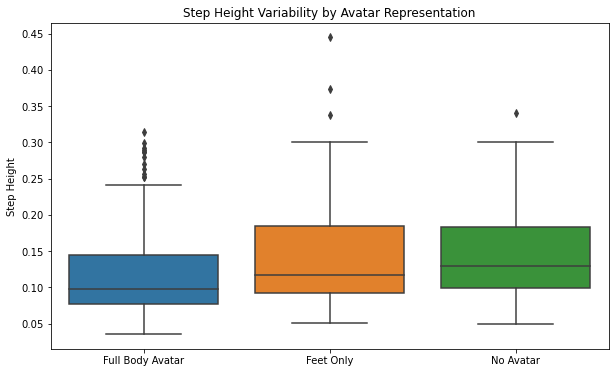

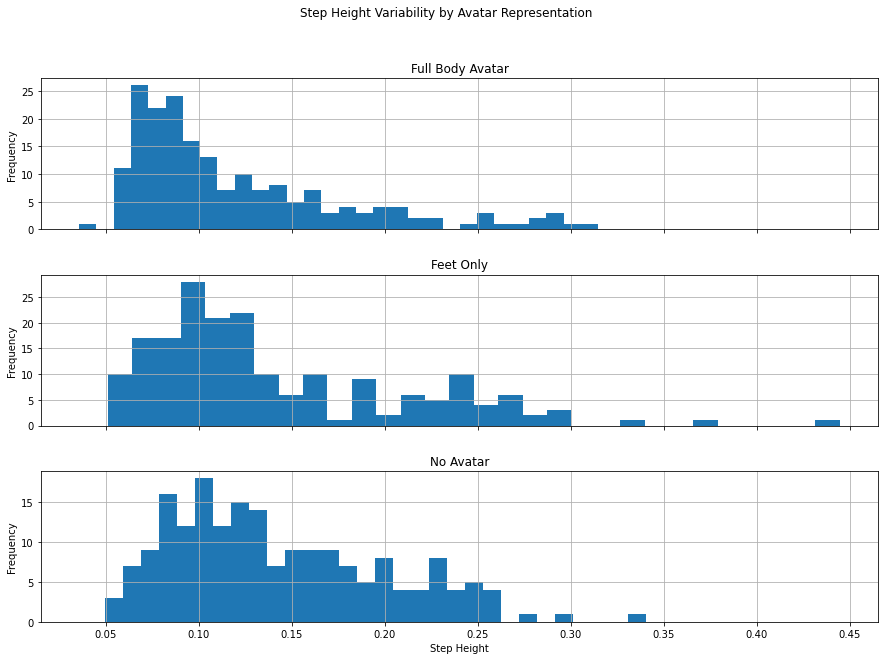

One-way ANOVA
F value: 7.824518940911419
P value: 0.0004440476306702772

Tukey's HSD post-hoc test results:
          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------
       Feet Only Full Body Avatar  -0.0212 0.0026 -0.0362 -0.0063   True
       Feet Only        No Avatar   0.0011    0.9 -0.0139   0.016  False
Full Body Avatar        No Avatar   0.0223 0.0014  0.0074  0.0372   True
------------------------------------------------------------------------


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the Excel file
df = pd.read_excel('data/distances.xlsx', sheet_name='Stepheight_corrected')

# Initialize empty lists to hold data
data = {'Full Body Avatar': [], 'Feet Only': [], 'No Avatar': []}

# Loop through the columns and separate the data according to the representation condition
for col in df.columns:
    participant_id, condition = col.split('_')
    if condition == '1':
        data['Full Body Avatar'].extend(df[col].dropna().tolist())
    elif condition == '2':
        data['Feet Only'].extend(df[col].dropna().tolist())
    elif condition == '3':
        data['No Avatar'].extend(df[col].dropna().tolist())

# Convert the data dict to a DataFrame for easier handling
df_data = pd.DataFrame(data)

# Compute variance for each condition
variance = df_data.var()

print("Step Height Variability (Variance):")
print(variance)

# Boxplot for each condition
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_data)
plt.title('Step Height Variability by Avatar Representation')
plt.ylabel('Step Height')
plt.show()

# Histogram for each condition
df_data.hist(bins=30, figsize=(15,10), layout=(3,1), sharex=True)
for ax in plt.gcf().get_axes():
    ax.set_ylabel('Frequency')
plt.xlabel('Step Height')
plt.suptitle('Step Height Variability by Avatar Representation')
plt.show()

# ANOVA
f_val, p_val = stats.f_oneway(df_data['Full Body Avatar'], df_data['Feet Only'], df_data['No Avatar'])

print('One-way ANOVA')
print('F value:', f_val)
print('P value:', p_val)

# Post-hoc test if ANOVA is significant
if p_val < 0.05:
    # Reshape the data
    df_melt = pd.melt(df_data)
    posthoc = pairwise_tukeyhsd(df_melt['value'], df_melt['variable'], alpha=0.05)
    print("\nTukey's HSD post-hoc test results:")
    print(posthoc)
